In [186]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['zomato.csv']


**Import the libraries**

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read the csv file

In [188]:
data = pd.read_csv('../input/zomato.csv')

Let's check our data

In [189]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [191]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


Clear the columns which are not required to find the best out of best

In [192]:
data.drop(['url','address','phone','reviews_list','menu_item','listed_in(city)'], axis=1,inplace=True)

In [193]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


Heatmap to check for the null values

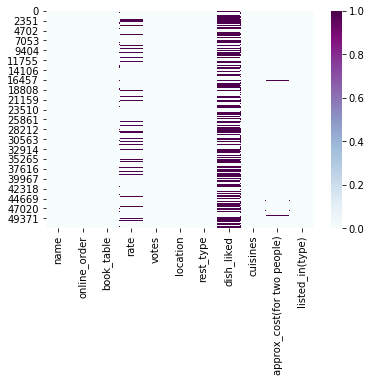

In [194]:
sns.heatmap(data.isnull(),cmap='BuPu')

Null values containg columns: Rate,Dish_Liked,Approx_cost,rest_type,cuisines

In [195]:
data[data['rate'].isna()]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
84,Chill Out,No,No,NaN,0,Banashankari,Quick Bites,NaN,"South Indian, Chinese",100,Delivery
90,Me And My Cake,No,No,NaN,0,Banashankari,Delivery,NaN,"Bakery, Desserts",500,Delivery
91,Sunsadm,No,No,NaN,0,Banashankari,"Takeaway, Delivery",NaN,South Indian,400,Delivery
92,Annapooraneshwari Mess,No,No,NaN,0,Banashankari,Mess,NaN,South Indian,200,Delivery
107,Coffee Shopee,No,No,NaN,0,Banashankari,"Takeaway, Delivery",NaN,Beverages,250,Delivery
113,Dharwad Line Bazaar Mishra Pedha,No,No,NaN,0,Banashankari,Dessert Parlor,NaN,Mithai,150,Delivery
114,Cake Bite,No,No,NaN,0,Banashankari,Bakery,NaN,Bakery,300,Delivery
115,Aarush's Food Plaza,No,No,NaN,0,Banashankari,Quick Bites,NaN,"North Indian, Street Food",200,Delivery
116,Wood Stove,No,No,NaN,0,Banashankari,"Takeaway, Delivery",NaN,South Indian,150,Delivery
117,Kulfi & More,No,No,NaN,0,Banashankari,Dessert Parlor,NaN,"Ice Cream, Desserts, Juices",150,Delivery


Rating = NaN : Votes: 0

So we will fill those ratings with '0/5'

In [196]:
data['rate'] = data['rate'].fillna('0/5')

Same for Dish_liked

In [197]:
data[data['dish_liked'].isna()]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,Buffet
19,360 Atoms Restaurant And Cafe,Yes,No,3.1/5,13,Banashankari,Cafe,NaN,"Cafe, Chinese, Continental, Italian",400,Cafes
22,Cafe Coffee Day,No,No,3.6/5,28,Banashankari,Cafe,NaN,"Cafe, Fast Food",900,Cafes
24,Hide Out Cafe,No,No,3.7/5,31,Banashankari,Cafe,NaN,Cafe,300,Cafes
25,CAFE NOVA,No,No,3.2/5,11,Banashankari,Cafe,NaN,"Cafe, Bakery",600,Cafes
26,Coffee Tindi,Yes,No,3.8/5,75,Banashankari,"Cafe, Quick Bites",NaN,"Cafe, South Indian",200,Cafes
27,Sea Green Cafe,No,No,3.3/5,4,Banashankari,Cafe,NaN,"Cafe, Fast Food, Beverages",500,Cafes
28,Cuppa,No,No,3.3/5,23,Banashankari,Cafe,NaN,"Cafe, Fast Food",550,Cafes
32,Sweet Truth,Yes,No,3.9/5,35,Banashankari,Delivery,NaN,"Bakery, Desserts",500,Delivery
36,Fast And Fresh,Yes,No,2.8/5,91,Banashankari,Quick Bites,NaN,"North Indian, Chinese, Fast Food",400,Delivery


In [198]:
data['dish_liked'] = data['dish_liked'].fillna('No Information')

In [199]:
data[data['approx_cost(for two people)'].isna()]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
1662,Papa Khan Rasoi,No,No,0/5,0,NaN,NaN,No Information,NaN,NaN,Delivery
1768,Innate,No,No,0/5,0,JP Nagar,Delivery,No Information,Beverages,NaN,Delivery
1795,Super Chef's (New Royal treat),No,No,0/5,0,Bannerghatta Road,Quick Bites,No Information,"North Indian, Chinese, South Indian",NaN,Delivery
3069,Super Chef's (New Royal treat),No,No,-,0,Bannerghatta Road,Quick Bites,No Information,"North Indian, Chinese, South Indian",NaN,Delivery
3774,The Hub - Ibis Bengaluru,No,No,3.9/5,237,Marathahalli,Bar,"Dal Makhani, Cocktails, Lunch Buffet, Breakfas...",Finger Food,NaN,Buffet
3954,North Indian Kitchen,No,No,3.2/5,13,HSR,Takeaway,No Information,North Indian,NaN,Delivery
4040,Only Parathas,No,No,3.3/5,6,HSR,"Takeaway, Delivery",No Information,North Indian,NaN,Delivery
4421,Innate,No,No,0/5,0,Sarjapur Road,Delivery,No Information,Beverages,NaN,Delivery
4852,The Hub - Ibis Bengaluru,No,No,3.9/5,237,Marathahalli,Bar,"Dal Makhani, Cocktails, Lunch Buffet, Breakfas...",Finger Food,NaN,Dine-out
4952,The Hub - Ibis Bengaluru,No,No,3.9/5,237,Marathahalli,Bar,"Dal Makhani, Cocktails, Lunch Buffet, Breakfas...",Finger Food,NaN,Drinks & nightlife


In [200]:
data[data['rest_type'].isna()]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
999,Mughlai Kitchen,Yes,No,3.5/5,269,BTM,NaN,"Momos, Oreo Shake","Mughlai, North Indian, Chinese, Momos",600,Delivery
1300,Eat & Joy Restaurant,Yes,No,3.0/5,7,JP Nagar,NaN,No Information,"Fast Food, Finger Food",300,Delivery
1376,Kababish Restaurant,Yes,No,3.6/5,15,BTM,NaN,No Information,"North Indian, Chinese, Arabian",700,Delivery
1565,Goli Vada Pav No 1,No,No,0/5,0,Bannerghatta Road,NaN,No Information,"Street Food, Burger",150,Delivery
1637,Ammi's Biryani,No,No,2.4/5,392,Bannerghatta Road,NaN,"Chicken Biryani, Hyderabadi Biryani, Rolls, Mu...","Biryani, North Indian",500,Delivery
1662,Papa Khan Rasoi,No,No,0/5,0,NaN,NaN,No Information,NaN,NaN,Delivery
1822,Bottle Genie,Yes,No,0/5,0,JP Nagar,NaN,No Information,Beverages,250,Delivery
2023,Goli Vada Pav No 1,No,No,0/5,0,Bannerghatta Road,NaN,No Information,"Street Food, Burger",150,Dine-out
2044,Ammi's Biryani,No,No,2.4/5,392,Bannerghatta Road,NaN,"Chicken Biryani, Hyderabadi Biryani, Rolls, Mu...","Biryani, North Indian",500,Dine-out
2330,Bottle Genie,Yes,No,0/5,0,JP Nagar,NaN,No Information,Beverages,250,Dine-out


In [201]:
data['rest_type'] = data['rest_type'].fillna('No Information')

In [202]:
data['cuisines'] = data['cuisines'].fillna('No Information')

In [204]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].fillna('No Information')

Now Visualization

In [205]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


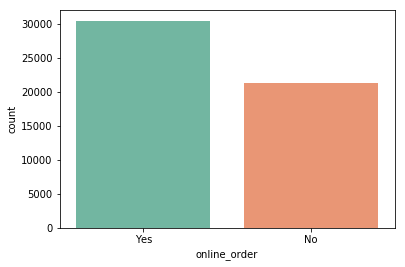

In [219]:
sns.countplot(x='online_order',data=data,palette='Set2')

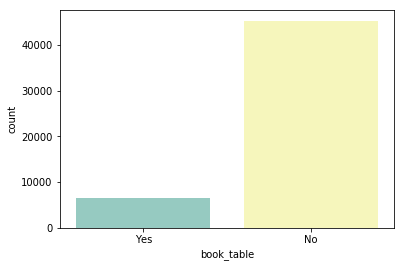

In [221]:
sns.countplot(x='book_table',data=data,palette='Set3')

In [237]:
data['location'].value_counts().head(10)

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Indiranagar              2083
Jayanagar                1926
Marathahalli             1846
Bannerghatta Road        1630
Bellandur                1286
Name: location, dtype: int64

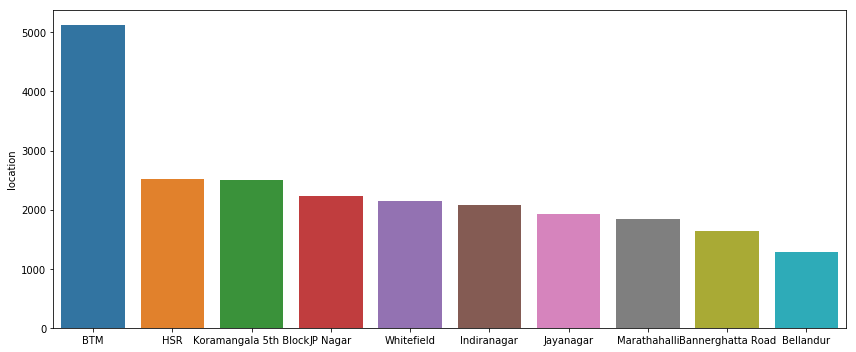

In [245]:
plt.figure(figsize=(12,5))
sns.barplot(data['location'].value_counts().head(10).index,data['location'].value_counts().head(10))
plt.tight_layout()

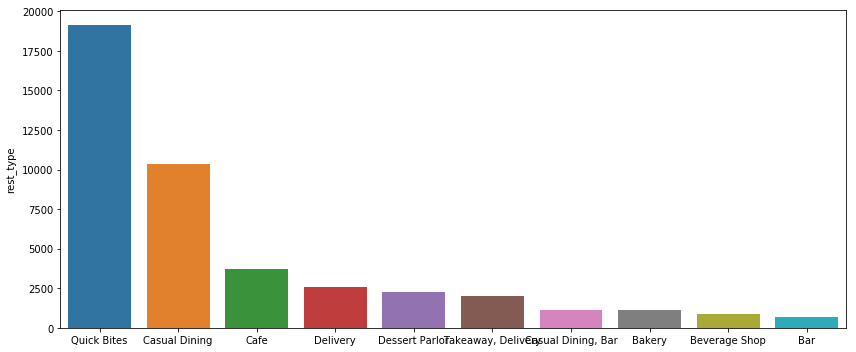

In [246]:
plt.figure(figsize=(12,5))
sns.barplot(data['rest_type'].value_counts().head(10).index,data['rest_type'].value_counts().head(10))
plt.tight_layout()

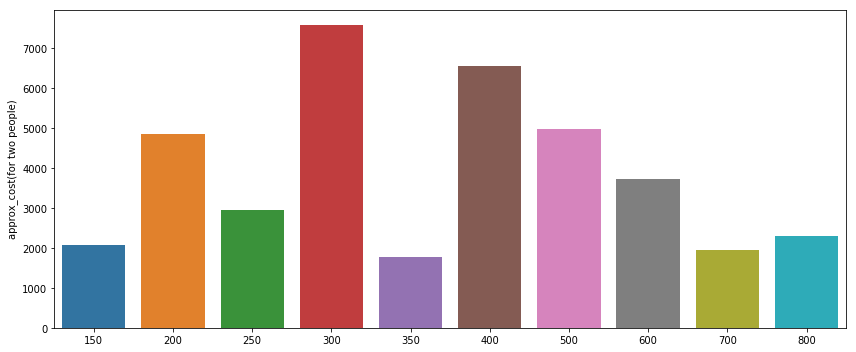

In [247]:
plt.figure(figsize=(12,5))
sns.barplot(data['approx_cost(for two people)'].value_counts().head(10).index,data['approx_cost(for two people)'].value_counts().head(10))
plt.tight_layout()

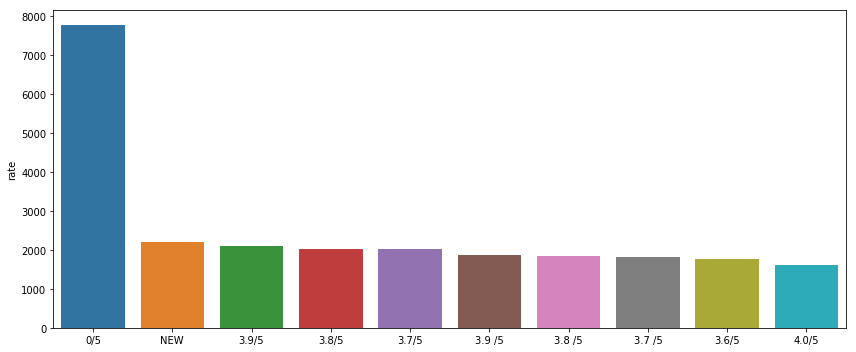

In [250]:
plt.figure(figsize=(12,5))
sns.barplot(data['rate'].value_counts().head(10).index,data['rate'].value_counts().head(10))
plt.tight_layout()

There are lot of rest. which are not voted even single time.

In [260]:
rating_data=data[np.logical_and(data['rate'].notnull(),data['rate']!='NEW')]
rating_data.index=range(rating_data.shape[0])
import re
rating=[]
for i in range(rating_data.shape[0]):
    rating.append(rating_data['rate'][i][:3])

rating_data['rate']=rating
rating_data.sort_values('rate',ascending=False)[['name','location','rate']].head(10).drop_duplicates()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,name,location,rate
40419,Belgian Waffle Factory,Brigade Road,4.9
29497,Asia Kitchen By Mainland China,Koramangala 5th Block,4.9
7812,AB's - Absolute Barbecues,BTM,4.9
17479,Milano Ice Cream,Indiranagar,4.9
6762,Punjab Grill,Whitefield,4.9
47480,Byg Brewski Brewing Company,Sarjapur Road,4.9
